# CSCI 5897 Homework 1
### Anya Lee

### **Problem 1**
Following the SIR in-class demo notebook (in Class\_Notes) which simulates the SIR model in the absence of population growth, I was able to write a function in Python that uses Forward Euler method to simulate the SIR model *in which the population is slowly growing*. 

When the population is slowly growing, we have the following system of ordinary differential equations now that we are accounting for birth and death, where birth rate $\mu_{birth} > \mu_{death}$.
$$
\dot{S} = \frac{-\beta SI}{N} + \mu N - \mu S \\
\dot{I} = \frac{\beta SI}{N} - \gamma I - \mu I \\
\dot{R} = \gamma I - \mu R
$$

In [3]:
import numpy as np
import matplotlib.pyplot as plt

In [4]:
def SIR_growth(S0, I0, R0, beta, gamma, mu_birth, mu_death, t_max, stepsize):
    T = np.arange(0, t_max + stepsize, stepsize)
    S = np.zeros(len(T))
    I = np.zeros(len(T))
    R = np.zeros(len(T))
    
    for idx, t in enumerate(T):
        if idx == 0:
            S[idx] = S0
            I[idx] = I0
            R[idx] = R0
        else:
            N = S[idx-1] + I[idx-1] + R[idx-1]

            dS_dt = -beta * S[idx-1] * I[idx-1] / N + mu_birth*N - mu_death*S[idx-1]
            dI_dt = beta * S[idx-1] * I[idx-1] / N - gamma*I[idx-1] - mu_death*I[idx-1]
            dR_dt = gamma*I[idx-1] - mu_death*R[idx-1]

            S[idx] = S[idx-1] + dS_dt * stepsize
            I[idx] = I[idx-1] + dI_dt * stepsize
            R[idx] = R[idx-1] + dR_dt * stepsize

    return S, I, R, T

Text(0.5, 1.0, 'SIR with Population Growth. Anya Lee.')

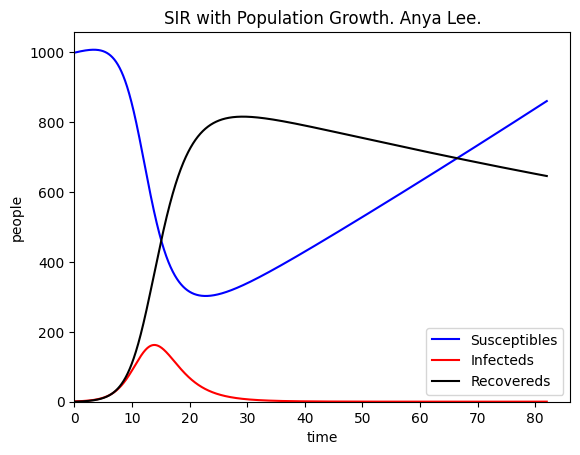

In [12]:
# SIR(S0,I0,R0, beta, gamma, mu_birth, mu_death, t_max, stepsize):
S,I,R,T = SIR_growth(999, 1, 0,
             1, 0.5, 0.01, 0.5*0.01, 82, 0.01)

fig, ax = plt.subplots()
ax.plot(T,S, color = 'b', label='Susceptibles')
ax.plot(T,I, color = 'r', label='Infecteds')
ax.plot(T,R, color = 'k', label='Recovereds')
ax.set_xlabel('time')
ax.set_ylabel('people')
ax.legend()
ax.set_ylim(bottom=0)
ax.set_xlim(left=0)
ax.set_title("SIR with Population Growth. Anya Lee.")

Above, we obtain a plot that captures the dynamics of transmission over the appropriate amount of time for the population to grow by 50% to a total of $N=1500$. Note: I could have used a "while" loop, but chose to find out when the total population reaches $N=1500$ manually. The computation is below.

In [11]:
N = S + I + R  # after simulation
print("Final N:", N[-1])

Final N: 1506.8023408245158


**Problem 2**